<a href="https://colab.research.google.com/github/oliverquintana/Redes-Neuronales-con-TensorFlow/blob/master/VisionDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de imágenes con redes neuronales

El dataset "fashion_mnist" consiste en 70,000 imágenes de ropa clasificada en 10 categorías.\
Cada imagen es de 28x28 pixeles en escala de grises

Importar las librerías necesarias.

In [0]:
import tensorflow as tf
from tensorflow import keras

# Importar el dataset de imágenes
El dataset está incluido en keras. \
Los datos son divididos en dos grupos:


1.   Conjunto de entrenamiento (60,000 ejemplos)
2.   Conjunto de validación (10,000 ejemplos)




In [2]:
mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Se importa la librería matplotlib para graficar las imágenes del dataset

Categoría: 9


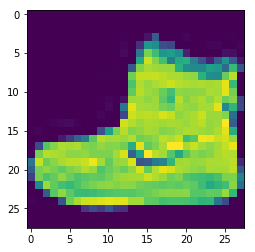

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print("Categoría: {}".format(train_labels[0]))

# Normalizar dataset
Cada imagen consiste en pixeles con rango 0-255 por lo que es necesario normalizar los datos entre 0-1 para obtener mejores resultados de la red neuronal

In [0]:
train_images_normalized = train_images / 255
test_images_normalized = test_images / 255

# Implementación de la red neuronal
La red consiste de 3 capas:


1.   Capa de entrada: Vector correspondiente a la imagen de entrada
2.   Capa oculta: 128 neuronas.
3.   Capa final: 10 neuronas correspondientes a las 10 categorías a clasificar.

Donde:


*   "Flatten": Convierte el array de la imagen 2D a 1D.
*   "relu": Función de activación.
*   "softmax": Selecciona la neurona de la capa final con el valor más alto, correspondiente a la probabilidad más alta en la que se clasifica la imagen.




In [5]:
model = keras.models.Sequential([keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation = tf.nn.relu),
                                 keras.layers.Dense( 10, activation = tf.nn.softmax)])

W0621 16:46:14.755890 140363377387392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Clase para detener el entrenamiento al alcanzar un valor de pérdida selecionado:

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get("loss") < 0.3):
      print("\nPérdida es baja, terminando entrenamiento")
      self.model.stop_training = True
      
callbacks = myCallback()

Entrenamiento de la red neuronal:

In [7]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(train_images_normalized, train_labels, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.5021 - acc: 0.8239
Epoch 2/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3816 - acc: 0.8621
Epoch 3/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3378 - acc: 0.8784
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3138 - acc: 0.8846
Epoch 5/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.2989 - acc: 0.8887
Pérdida es baja, terminando entrenamiento
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2987 - acc: 0.8888


# Validación de la red neuronal
Se comprueba la precisión de la clasificación con datos no vistos durante el entrenamiento (conjunto de prueba).

In [8]:
model.evaluate(test_images_normalized, test_labels)

10000/10000 [==============================] - 0s 36us/sample - loss: 0.3559 - acc: 0.8710


[0.35594406287670133, 0.871]

La pérdida, como es de esperarse, es mayor con datos no antes vistos por la red neuronal que con el conjunto de entrenamiento. No obstante, el resultado puede considerarse como bueno.

# Red Neuronal Clasificadora de Números Escritos a Mano

El dataset mnist consta de ejemplos de números escritos a mano en imágenes de 28x28 pixeles etiquetados con su valor correspondiente divido en el conjunto de entrenamiento (60,000 ejemplos) y de validación (10,000 ejemplos).

# Importar librerías

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Importar y regularizar el dataset

11493376/11490434 [==============================] - 0s 0us/step
5


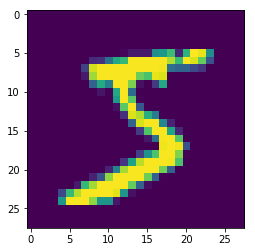

In [10]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train_reg = x_train / 255
x_test_reg = x_test / 255

plt.imshow(x_train[0])
print(y_train[0])

# Entrenamiento de la red neuronal

El entrenamiento se detiene al alcanzar un 99% de precisión en el conjunto de datos de entrenamiento.

In [11]:
model = tf.keras.models.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                                    keras.layers.Dense(128, activation = tf.nn.relu),
                                    keras.layers.Dense( 10, activation = tf.nn.softmax)])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get("acc") > 0.99):
      print("\n99% de precisión alcanzado, entrenamiento terminado")
      self.model.stop_training = True
      
callbacks = myCallback()

model.fit(x_train_reg, y_train, epochs = 10, callbacks = [callbacks])

Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2538 - acc: 0.9265
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1128 - acc: 0.9673
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0773 - acc: 0.9764
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0584 - acc: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0453 - acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0340 - acc: 0.9893
Epoch 7/10
59584/60000 [============================>.] - ETA: 0s - loss: 0.0282 - acc: 0.9916
99% de precisión alcanzado, entrenamiento terminado
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0282 - acc: 0.9916


# Validación
Prueba de precisión en predicción con el conjunto de datos de prueba.

In [12]:
model.evaluate(x_test_reg, y_test)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0775 - acc: 0.9786


[0.07749961241553538, 0.9786]